# Netflix 데이터 분석
### 데이터 수집
- flixpatrol 사이트에서 데이터 수집
    - `https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1`


- kaggle에서 netflix 컨텐츠 데이터 수집
    - `https://www.kaggle.com/shivamb/netflix-shows`


- 컨텐츠의 등급데이터는 아래의 코드 사용
```
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
```

# 1. flixpatrol 데이터 수집

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [153]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
net=pd.read_csv("netflix_titles.csv")

In [4]:
url = "https://flixpatrol.com/top10/netflix/world/today/full/#netflix-1"

In [5]:
response = requests.get(url)
dom = BeautifulSoup(response.text, "html.parser")

In [6]:
elements = dom.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")
len(elements)

101

In [7]:
element = elements[0]
data = {
    "title":element.select("td")[2].select_one("a").text,
    "link":"https://flixpatrol.com"+element.select("td")[2].select_one("a").get("href")
}
data

{'title': 'Texas Chainsaw Massacre',
 'link': 'https://flixpatrol.com/title/texas-chainsaw-massacre/'}

In [8]:
mdatas = []
for element in elements:
    mdatas.append({
          "title":element.select("td")[2].select_one("a").text,
          "link":"https://flixpatrol.com"+element.select("td")[2].select_one("a").get("href")
        })
df = pd.DataFrame(mdatas)
df.tail()

,title,link
96,Halloween,https://flixpatrol.com/title/halloween-1978/
97,Ladies in Lavender.,https://flixpatrol.com/title/ladies-in-lavender/
98,Wonder,https://flixpatrol.com/title/wonder/
99,Dora and the Lost City of Gold,https://flixpatrol.com/title/dora-and-the-lost...
100,Once Upon a Time in Hollywood,https://flixpatrol.com/title/once-upon-a-time-...


In [9]:
url1 = "https://flixpatrol.com/top10/netflix/world/today/full/#netflix-2"

In [10]:
response = requests.get(url1)
dom = BeautifulSoup(response.text, "html.parser")

In [11]:
tdatas=[]
elements = dom.select("#netflix-2 > div.-mx-content > div > div > table > tbody>tr ")
len(elements)

92

In [12]:
for element in elements:
    tdatas.append({
          "title":element.select("td")[2].select_one("a").text,
          "link":"https://flixpatrol.com"+element.select("td")[2].select_one("a").get("href")
        })
df = pd.DataFrame(tdatas)
df.tail()

,title,link
87,Newton's Cradle,https://flixpatrol.com/title/newtons-cradle/
88,Lucifer,https://flixpatrol.com/title/lucifer/
89,Prison Playbook,https://flixpatrol.com/title/prison-playbook/
90,Soy Georgina,https://flixpatrol.com/title/soy-georgina/
91,The King's Affection,https://flixpatrol.com/title/the-kings-affection/


In [13]:
cdatas=[]
elements = dom.select("body > div:nth-child(5) > div > div:nth-child(1) > div > table > tbody > tr")
len(elements)

90

In [14]:
for element in elements:
    cdatas.append({
         "title":element.select("td")[0].text,
        "top overall":element.select("td")[1].text.strip(),
        "top movie":element.select("td")[2].text.strip(),
        "top tv show":element.select("td")[3].text.strip(),
        })
df = pd.DataFrame(cdatas)
df.tail()

,title,top overall,top movie,top tv show
85,United Kingdom,Inventing Anna,13 Minutes,Inventing Anna
86,United States,Inventing Anna,Texas Chainsaw Massacre,Inventing Anna
87,Uruguay,,Parallel Mothers,Café con aroma de mujer
88,Venezuela,,Texas Chainsaw Massacre,Café con aroma de mujer
89,Vietnam,,John Wick: Chapter 3 – Parabellum,Forecasting Love and Weather


# 2. Kaggle Netflix 데이터 분석

### net=넷플릭스 mdatas=영화순위 tdatas=tv순위 cdatas=나라별 순위

In [15]:
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


rating 치환

In [17]:
net.replace({'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'},inplace=True)

<AxesSubplot:xlabel='type', ylabel='count'>

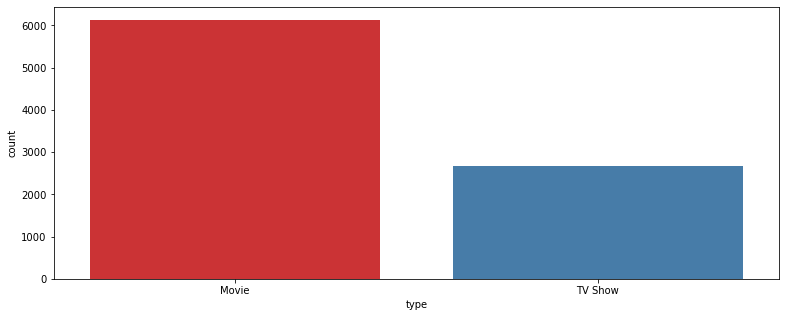

In [165]:
sns.countplot(x="type",palette="Set1", data=net)

> 영화 타입이 TV타입보다 2배정도 많다

<AxesSubplot:xlabel='rating', ylabel='count'>

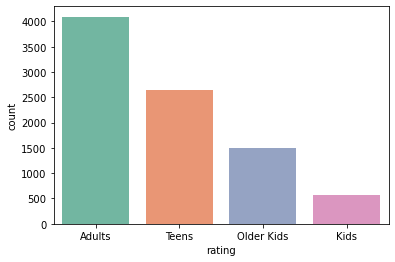

In [20]:
sns.countplot(x="rating", data=net, palette="Set2", order=net['rating'].value_counts().index[0:4])

<AxesSubplot:xlabel='rating', ylabel='count'>

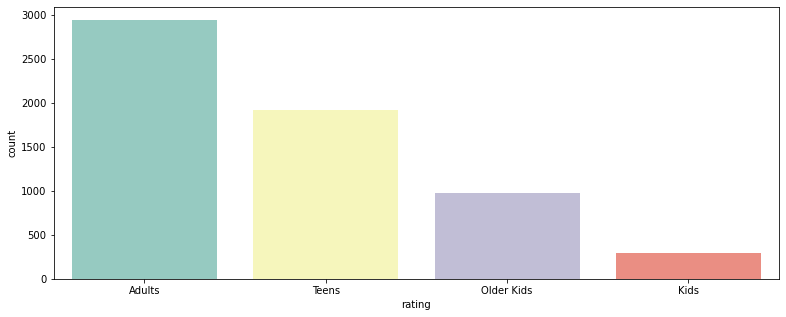

In [207]:
sns.countplot(x="rating", data=movie_count, palette="Set3", order=net['rating'].value_counts().index[0:4])

<AxesSubplot:xlabel='rating', ylabel='count'>

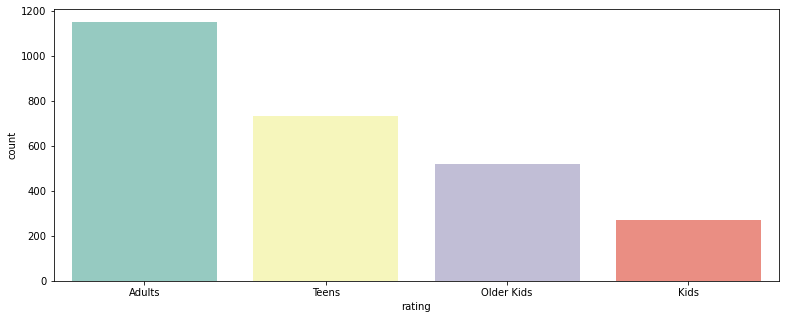

In [208]:
sns.countplot(x="rating", data=tv_count, palette="Set3", order=net['rating'].value_counts().index[0:4])

> 전체적으로는 성인 등급이 가장 많다

### 영화와 티비 데이터로 분리

In [114]:
movie_count=net[net["type"]=='Movie']

In [115]:
tv_count=net[net["type"]=='TV Show']

In [116]:
country_df = net['country'].value_counts().reset_index()
country_df = country_df[country_df['country'] /  country_df['country'].sum() > 0.01]

fig = px.pie(country_df, values='country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [25]:
#전체적으로는 미국, 인도, 영국등의 순위가 높다

In [209]:

country_df = movie_count['country'].value_counts().reset_index()
country_df = country_df[country_df['country'] /  country_df['country'].sum() > 0.01]

fig = px.pie(country_df, values='country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()



In [27]:
#영화에서는 미국,인도,영국,캐나다..등의 순위가 높다

In [118]:
#tv 프로그램은 상위권에 일본과 한국이 위치한다.

In [125]:
country_df = tv_count['country'].value_counts().reset_index()
country_df = country_df[country_df['country'] /  country_df['country'].sum() > 0.01]

fig = px.pie(country_df, values='country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<AxesSubplot:xlabel='count', ylabel='release_year'>

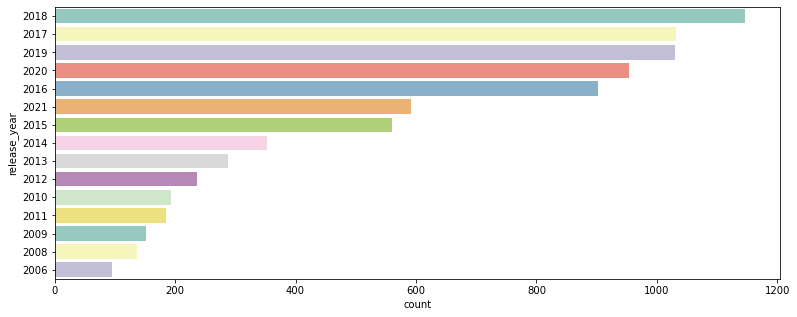

In [119]:
sns.countplot(y="release_year", data=net, palette="Set3", order=net['release_year'].value_counts().index[0:15])

In [32]:
!pip install wordcloud

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



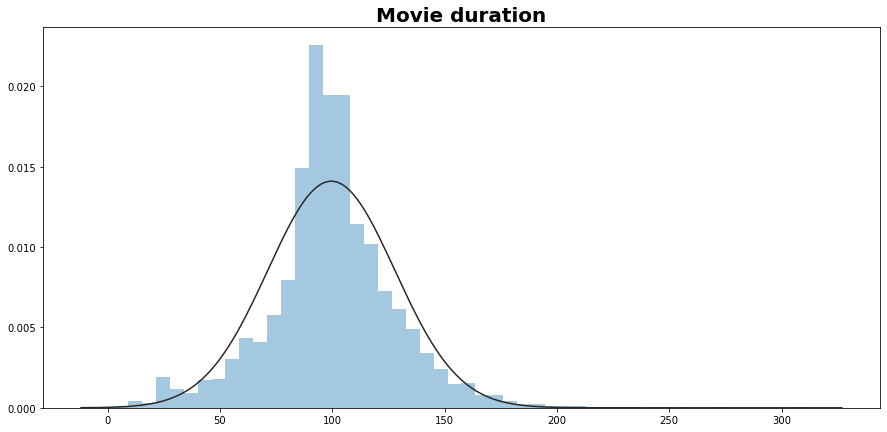

In [74]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(movie_count['duration'].str.extract('(\d+)'),fit=norm,kde=False)
plt.title('Movie duration',fontweight="bold",size=20)
plt.show()


In [35]:
!pip install plotly.express

### 한국 영화 장르 순위

In [195]:
korea_mv=movie_count[movie_count["country"]=='South Korea']

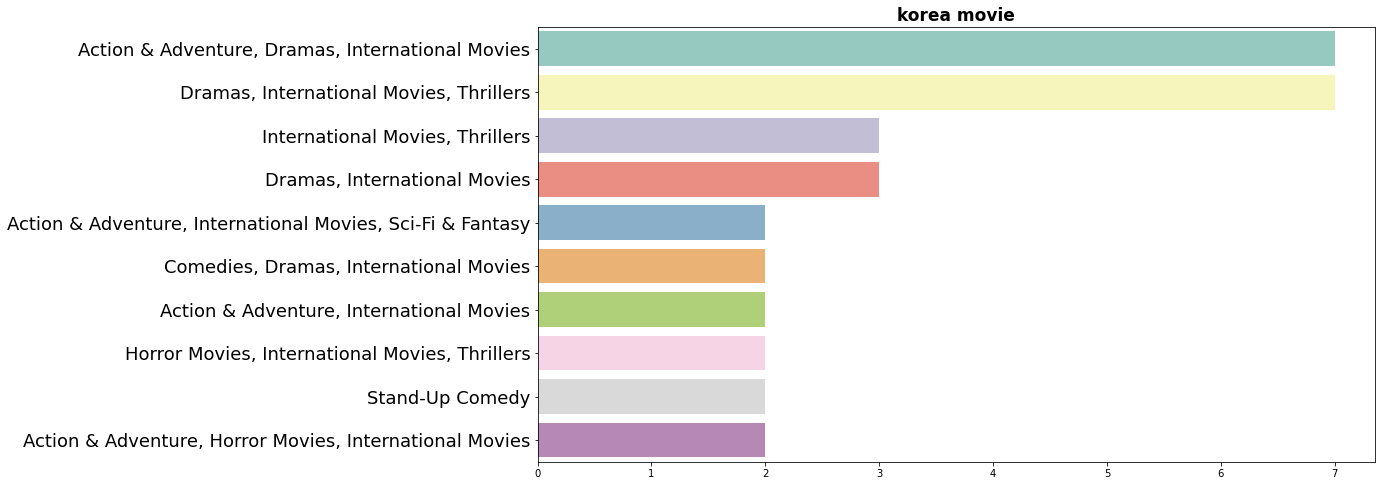

In [196]:
plt.figure(figsize=(15,8))
sns.barplot(y = korea_mv["listed_in"].value_counts().head(10).index,
            x = korea_mv["listed_in"].value_counts().head(10).values,palette="Set3")
plt.yticks(rotation=0,size=18)
plt.title("korea movie",fontweight="bold",size=17)
plt.show()

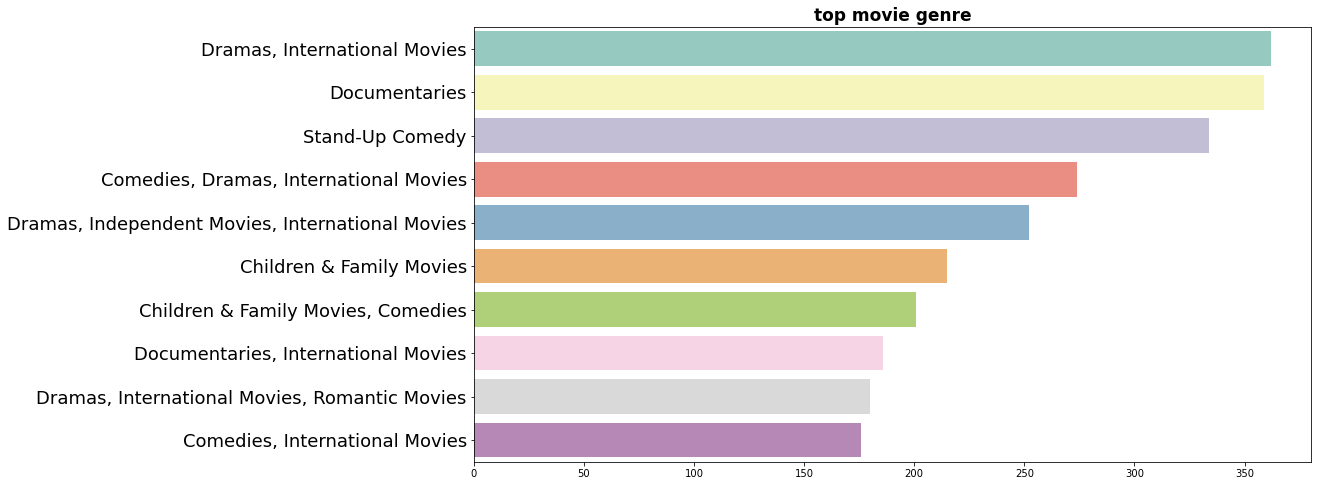

In [197]:
plt.figure(figsize=(15,8))
sns.barplot(y = movie_count["listed_in"].value_counts().head(10).index,
            x = movie_count["listed_in"].value_counts().head(10).values,palette="Set3")
plt.yticks(rotation=0,size=18)
plt.title("top movie genre",fontweight="bold",size=17)
plt.show()

## 워드클라우드

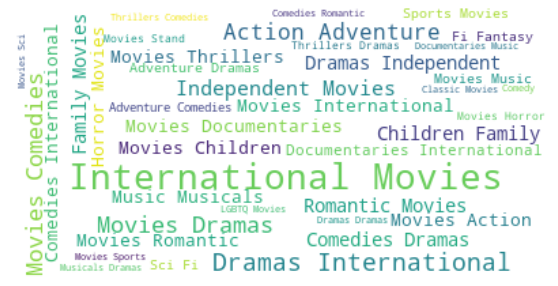

In [206]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(movie_count['listed_in'])

plt.rcParams['figure.figsize'] = (13, 5)
wordcloud = WordCloud(max_words=40,background_color="white").generate(str(text))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

> International, Dramas, Documentaries 순으로 수요가 많다.

In [126]:
#TV장르 순위
korea_tv=tv_count[tv_count["country"]=='South Korea']

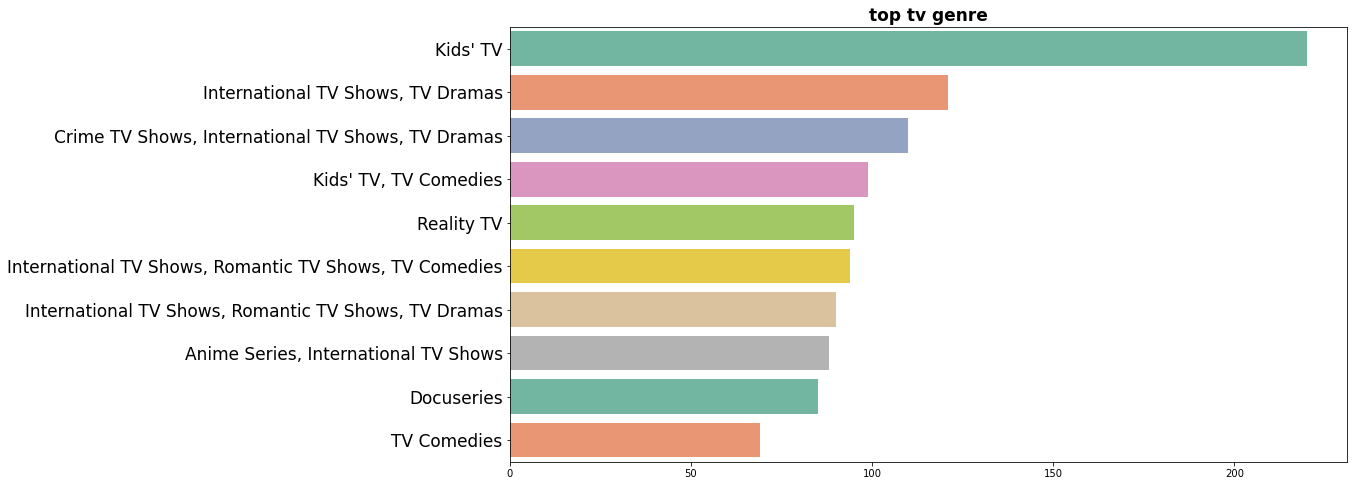

In [182]:
plt.figure(figsize=(15,8))
sns.barplot(y = tv_count["listed_in"].value_counts().head(10).index,
            x = tv_count["listed_in"].value_counts().head(10).values,palette="Set2")
plt.yticks(rotation=0,size=17)
plt.title("top tv genre",fontweight="bold",size=17)
plt.show()

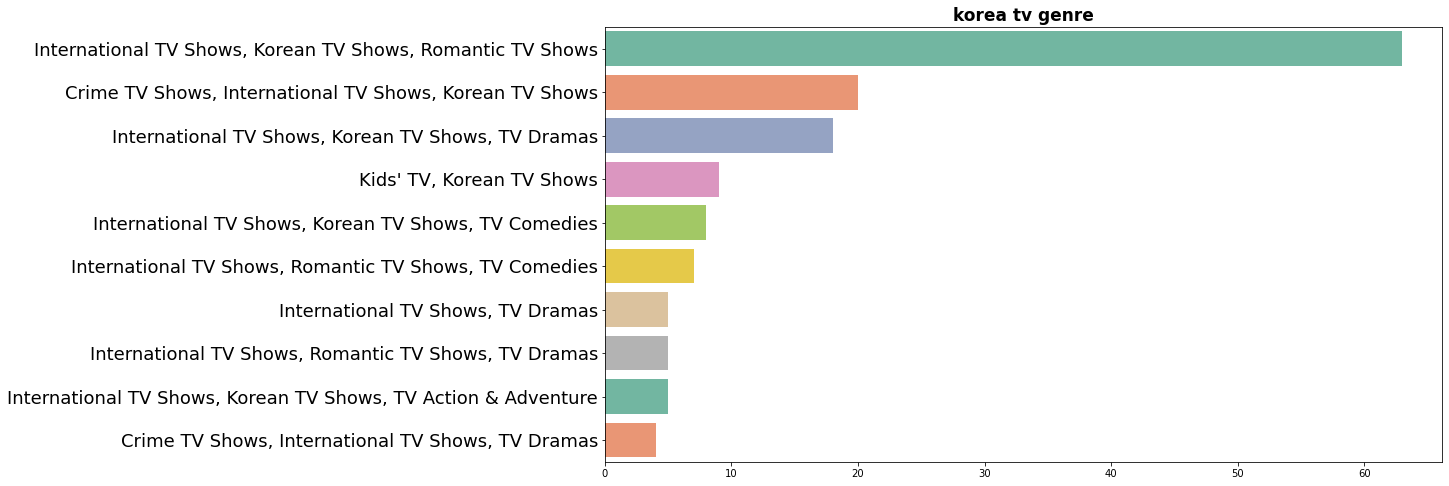

In [181]:
plt.figure(figsize=(15,8))
sns.barplot(y = korea_tv["listed_in"].value_counts().head(10).index,
            x = korea_tv["listed_in"].value_counts().head(10).values,palette="Set2")
plt.yticks(rotation=0,size=18)
plt.title("korea tv genre",fontweight="bold",size=17)
plt.show()

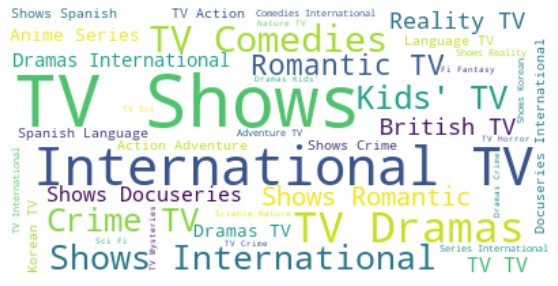

In [202]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(tv_count['listed_in'])

plt.rcParams['figure.figsize'] = (13, 5)
wordcloud = WordCloud(max_words=40,background_color="white").generate(str(text)
                                                                     )
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [203]:
net['genre'] = net['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
net['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [204]:
movie_count['genre'] = movie_count['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
movie_count['genre'].head()

<ipython-input-204-4153b201078b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                                       [Documentaries]
6                            [Children & Family Movies]
7     [Dramas, Independent Movies, International Mov...
9                                    [Comedies, Dramas]
12                       [Dramas, International Movies]
Name: genre, dtype: object

In [205]:
tv_count['genre'] = tv_count['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
tv_count['genre'].head()

<ipython-input-205-9182f6f9eddb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
5                 [TV Dramas, TV Horror, TV Mysteries]
Name: genre, dtype: object

In [97]:
def check_genre_contains(genres):
    for genre in genres:
        if genre in top_movies_genres:
            return True
    return False

In [101]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

In [99]:
movie_count['principal_genre'] = movie_count['genre'].apply(lambda genres: genres[0])
movie_count['principal_genre'].head()

<ipython-input-99-f7ac98cb6ba1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                Documentaries
6     Children & Family Movies
7                       Dramas
9                     Comedies
12                      Dramas
Name: principal_genre, dtype: object

In [109]:
tv_count['principal_genre'] =tv_count['genre'].apply(lambda genres: genres[0])
tv_count['principal_genre']

<ipython-input-109-232e3414dada>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1       International TV Shows
2               Crime TV Shows
3                   Docuseries
4       International TV Shows
5                    TV Dramas
                 ...          
8795              Anime Series
8796    International TV Shows
8797                  Kids' TV
8800    International TV Shows
8803                  Kids' TV
Name: principal_genre, Length: 2676, dtype: object

In [112]:
def check_genre_contains1(genres):
    for genre in genres:
        if genre in top_tv_genres:
            return True
    return False

In [111]:
top_tv_genres = [
    "Kids' TV" ,
    'International TV Shows',
    'Crime TV Shows',
    'TV Dramas',

]

In [104]:
year_genre_df = movie_count[(movie_count['principal_genre'].isin(top_movies_genres)) & (movie_count['release_year'] >= 2017)].groupby(['principal_genre', 'release_year']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'release_year', 'count']

fig = px.sunburst(year_genre_df, path=['release_year', 'principal_genre'], values='count')
fig.show()

In [113]:
year_genre_df = tv_count[(tv_count['principal_genre'].isin(top_tv_genres)) & (tv_count['release_year'] >= 2017)].groupby(['principal_genre', 'release_year']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'release_year', 'count']

fig = px.sunburst(year_genre_df, path=['release_year', 'principal_genre'], values='count')
fig.show()

In [144]:
net['count'] = 1

In [146]:
data = net.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = net.loc[net['country'].isin(data)]

In [148]:
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T

In [193]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#E7F4FC', '#57C6C3'])

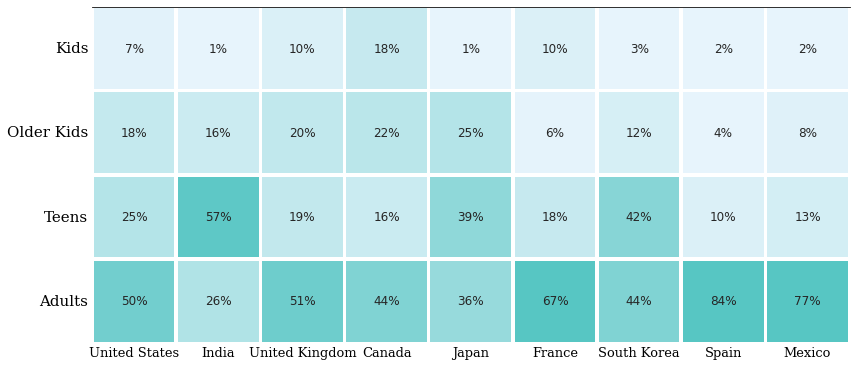

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India','United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=13)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()